In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical

In [70]:
df = pd.read_csv("TOTAL_DATA.csv")

In [71]:
df.head()

Time_Stamp  Temperature  Humidity       Light         CO2  \
0  2/2/2015 14:19      23.7000    26.272  585.200000  749.200000   
1  2/2/2015 14:19      23.7180    26.290  578.400000  760.400000   
2  2/2/2015 14:21      23.7300    26.230  572.666667  769.666667   
3  2/2/2015 14:22      23.7225    26.125  493.750000  774.750000   
4  2/2/2015 14:23      23.7540    26.200  488.600000  779.000000   

   HumidityRatio  Occupancy  
0       0.004764          1  
1       0.004773          1  
2       0.004765          1  
3       0.004744          1  
4       0.004767          1

In [72]:
df.pop("Time_Stamp")
df.pop("HumidityRatio")

0        0.004764
1        0.004773
2        0.004765
3        0.004744
4        0.004767
           ...   
20555    0.004213
20556    0.004230
20557    0.004237
20558    0.004279
20559    0.004321
Name: HumidityRatio, Length: 20560, dtype: float64

In [73]:
features = df.columns[0:-1]
label = df.columns[-1]

In [74]:
df

Temperature  Humidity       Light          CO2  Occupancy
0          23.7000   26.2720  585.200000   749.200000          1
1          23.7180   26.2900  578.400000   760.400000          1
2          23.7300   26.2300  572.666667   769.666667          1
3          23.7225   26.1250  493.750000   774.750000          1
4          23.7540   26.2000  488.600000   779.000000          1
...            ...       ...         ...          ...        ...
20555      20.8150   27.7175  429.750000  1505.250000          1
20556      20.8650   27.7450  423.500000  1514.500000          1
20557      20.8900   27.7450  423.500000  1521.500000          1
20558      20.8900   28.0225  418.750000  1632.000000          1
20559      21.0000   28.1000  409.000000  1864.000000          1

[20560 rows x 5 columns]

In [75]:
one_day = 1*60*24

In [76]:
day0 = df[:one_day]
day1 = df[one_day:one_day*2]
day2 = df[one_day*2:one_day*3]

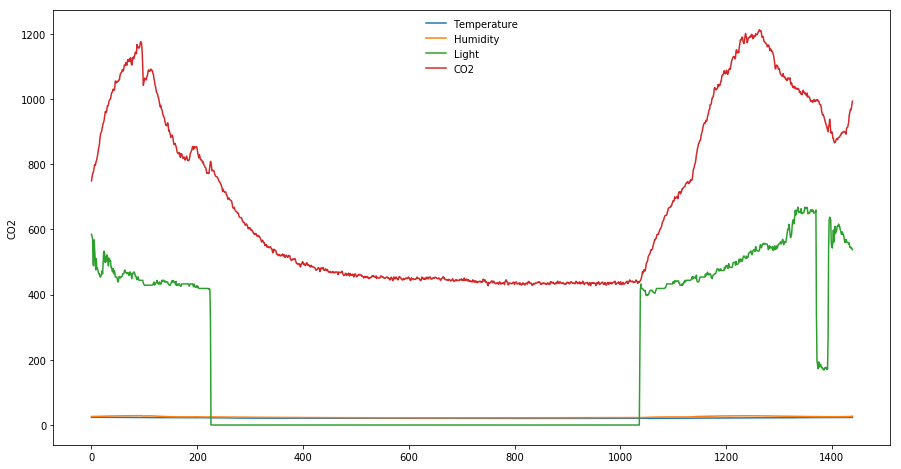

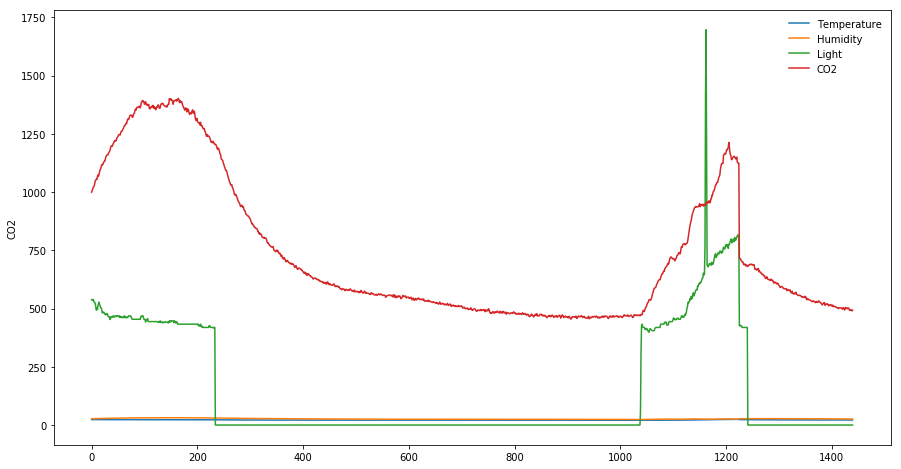

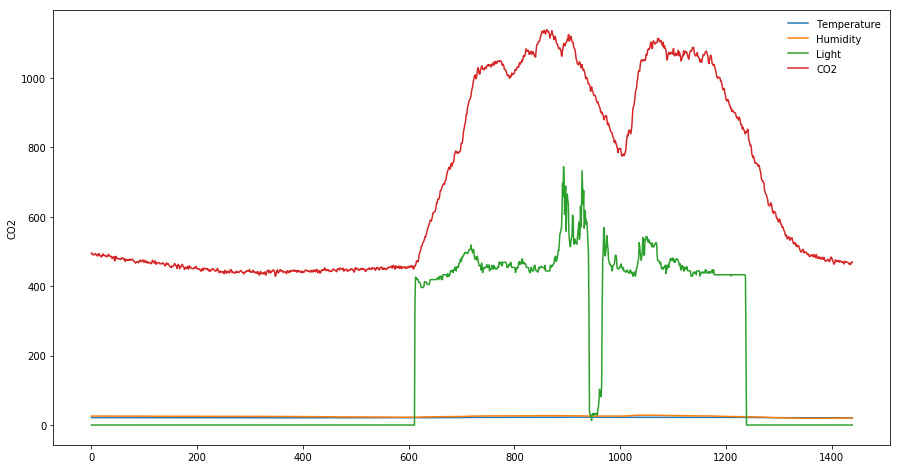

In [77]:
for day in [day0, day1, day2]:
    plt.figure(figsize=(15,8))
    for feature in features:
        sns.lineplot(data=day, x=range(0, len(day0)), y=feature, label=feature)
    plt.legend(frameon=False)
    plt.show()

In [78]:
def generate(X, Y, steps):
    x, y = [], []
    for i in range(0, len(X)):
        end_index = i+steps
        if end_index > len(X)-1:
            break
        else:
            x.append(X[i:end_index])
            y.append(Y[end_index])
    return x, y

In [79]:
x = np.array(df[features])
y = np.array(df[label])

In [80]:
x, y = generate(x, y, one_day*7)

In [81]:
x, y = np.asarray(x), np.asarray(y)

In [82]:
y.shape

(10480,)

In [83]:
x.shape

(10480, 10080, 4)

In [84]:
y = to_categorical(y)

In [85]:
y[0]

array([1., 0.])

In [86]:
print(x[0], y[0])

[[ 23.7        26.272     585.2       749.2      ]
 [ 23.718      26.29      578.4       760.4      ]
 [ 23.73       26.23      572.6666667 769.6666667]
 ...
 [ 20.5        33.7         0.        694.3333333]
 [ 20.5        33.7         0.        692.5      ]
 [ 20.5        33.745       0.        690.5      ]] [1. 0.]


In [87]:
model = models.Sequential()
model.add(layers.LSTM(10, activation="relu", return_sequences=False, input_shape=(x.shape[1], x.shape[2])))
model.add(layers.Dense(2, activation="softmax"))

In [88]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(x, y, batch_size=64, epochs=10, validation_split=0.3)

Train on 7335 samples, validate on 3145 samples
Epoch 1/10
4608/7335 [=================>............] - ETA: 4:34 - loss: 0.1784 - acc: 0.9622